In [44]:
# import sys
# !{sys.executable} -m pip install _pickle
import os
os.environ['R_HOME'] = '/u/home/y/yqg36/.conda/envs/rpy2-env/lib/R'

In [1]:
import pickle
import dill 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadall(filename):
    with open(filename, "rb") as f:
        while True:
            try:
                yield dill.load(f)
            except EOFError:
                break

In [3]:
def getregrets(auctions_list):
    regrets_means = []
    regrets_stds = []
    for auctions in auctions_list:
        if auctions is not None:
            regrets = [auction.regret for auction in auctions]
            regrets_means.append(np.mean(regrets))
            regrets_stds.append(np.std(regrets))
    return np.array(regrets_means), np.array(regrets_stds)

In [15]:
with open("data/Rep200/exponential_1000_DOP.pkl", "rb") as f:
    DOP_auctions_list = dill.load(f)
len(DOP_auctions_list)

200

In [16]:
RSOP_auctions_list = list(loadall("data/Rep200/exponential_1000_RSOP.pkl"))
len(RSOP_auctions_list)

200

In [5]:
RSKDE_auctions_list = list(loadall("data/uniform_100_20_RSKDE.pkl"))
len(RSKDE_auctions_list)

200

In [6]:
RSRDE_auctions_list_1 = list(loadall("data/uniform_100_20_RSRDE.pkl"))
len(RSRDE_auctions_list_1)

200

In [7]:
RSRDE_auctions_list_2 = list(loadall("data/Rep200/uniform_100_20_RSRDE.pkl"))
len(RSRDE_auctions_list_2)

200

In [9]:
RSKDE_regrets_means, RSKDE_regrets_stds = getregrets(RSKDE_auctions_list)
RSRDE_regrets_means_1, RSRDE_regrets_stds_1 = getregrets(RSRDE_auctions_list_1)
RSRDE_regrets_means_2, RSRDE_regrets_stds_2 = getregrets(RSRDE_auctions_list_2)

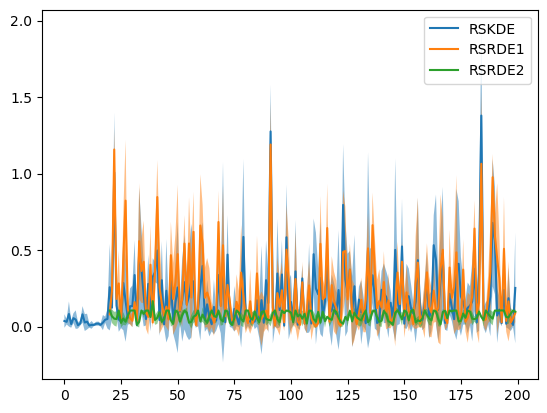

In [10]:
plt.plot(np.arange(200), RSKDE_regrets_means, label = "RSKDE")
plt.fill_between(np.arange(200), RSKDE_regrets_means - RSKDE_regrets_stds, RSKDE_regrets_means + RSKDE_regrets_stds, alpha = 0.5)
plt.plot(np.arange(20, 200), RSRDE_regrets_means_1, label = "RSRDE1")
plt.fill_between(np.arange(20, 200), RSRDE_regrets_means_1 - RSRDE_regrets_stds_1, RSRDE_regrets_means_1 + RSRDE_regrets_stds_1, alpha = 0.5)
plt.plot(np.arange(20, 200), RSRDE_regrets_means_2, label = "RSRDE2")
plt.fill_between(np.arange(20, 200), RSRDE_regrets_means_2 - RSRDE_regrets_stds_2, RSRDE_regrets_means_2 + RSRDE_regrets_stds_2, alpha = 0.5)
plt.legend()

In [60]:
# RSOP_regrets_means, RSOP_regrets_stds = getregrets(RSOP_auctions_list)
RSKDE_regrets_means, RSKDE_regrets_stds = getregrets(RSKDE_auctions_list)
RSRDE_regrets_means, RSRDE_regrets_stds = getregrets(RSRDE_auctions_list)

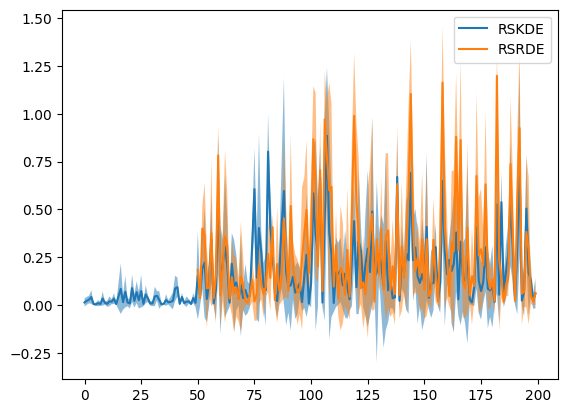

In [61]:
plt.plot(np.arange(200), RSKDE_regrets_means, label = "RSKDE")
plt.fill_between(np.arange(200), RSKDE_regrets_means - RSKDE_regrets_stds, RSKDE_regrets_means + RSKDE_regrets_stds, alpha = 0.5)
plt.plot(np.arange(50, 200), RSRDE_regrets_means, label = "RSRDE")
plt.fill_between(np.arange(50, 200), RSRDE_regrets_means - RSRDE_regrets_stds, RSRDE_regrets_means + RSRDE_regrets_stds, alpha = 0.5)
plt.legend()

Text(0.5, 1.0, 'RSRDE')

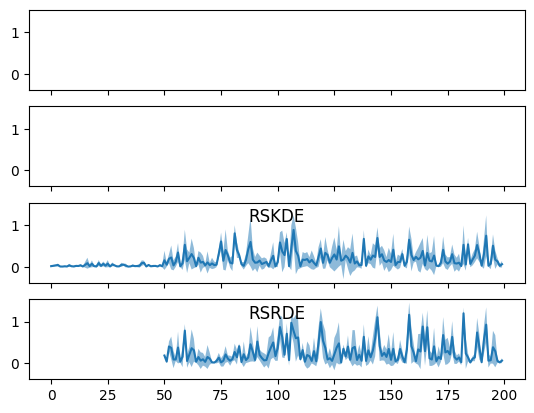

In [62]:
fig, axs = plt.subplots(4, sharex=True, sharey=True)
# axs[0].plot(np.arange(200), [auction.regret for auction in DOP_auctions_list])
# axs[0].set_title("DOP", y=1.0, pad=-14)
# axs[1].plot(np.arange(200), RSOP_regrets_means)
# axs[1].fill_between(np.arange(200), RSOP_regrets_means - RSOP_regrets_stds, RSOP_regrets_means + RSOP_regrets_stds, alpha = 0.5)
# axs[1].set_title("RSOP", y=1.0, pad=-14)
axs[2].plot(np.arange(200), RSKDE_regrets_means)
axs[2].fill_between(np.arange(200), RSKDE_regrets_means - RSKDE_regrets_stds, RSKDE_regrets_means + RSKDE_regrets_stds, alpha = 0.5)
axs[2].set_title("RSKDE", y=1.0, pad=-14)
axs[3].plot(np.arange(50, 200), RSRDE_regrets_means)
axs[3].fill_between(np.arange(50, 200), RSRDE_regrets_means - RSRDE_regrets_stds, RSRDE_regrets_means + RSRDE_regrets_stds, alpha = 0.5)
axs[3].set_title("RSRDE", y=1.0, pad=-14)

In [4]:
import pickle
with open("data/sim/normal/train_results_normal_rep1_50bids.pkl", "rb") as file:
    info = pickle.load(file)

In [14]:
for i, j in [(1, 2), (2, 3), (6, 7)]:
    print(i)
    print(j)

1
2
2
3
6
7
